In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import numpy as np
import xarray as xr
import cftime

In [9]:
path = r"C:\Users\Felicio.Cassalho\Work\Python_Development\ofs_dps\data\skill\1d_pair/"
# out_dir = r"C:\Users\Felicio.Cassalho\Work\Literature\OCSMesh_Paper\Figures\Figure_SUP1/"
out_dir = r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\model_runs\2019_07_01_12+120\R07\timeseries_plots/"

In [10]:
files = os.listdir(path)

In [11]:
stations_dict = {
    "9459450": "Sand Point (CO-OPS)",
    "9459881": "King Cove (CO-OPS)",
    "9461380": "Adak Island (CO-OPS)",
    "9461710": "Atka (CO-OPS)",
    "9462450": "Nikolski (CO-OPS)",
    "9462620": "Unalaska (CO-OPS)",
    "9464212": "Village Cove, St Paul Island (CO-OPS)",
    "9468333": "Unalakleet (CO-OPS)",
    "9468756": "Nome, Norton Sound (CO-OPS)",
    "46035": "CENTRAL BERING SEA (NDBC)",
    "46070": "SOUTHWEST BERING SEA (NDBC)",
    "46071": "WESTERN ALEUTIANS (NDBC)",
    "46072": "CENTRAL ALEUTIANS (NDBC)",
    "46073": "SOUTHEAST BERING SEA (NDBC)",
    "46075": "SHUMAGIN ISLANDS (NDBC)",
    "46265": "Nome (NDBC)",
}

In [45]:
roms = xr.open_dataset(r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\model_runs\2019_07_01_12+120\R07\ROMS/ROMS_stations_6h.nc",decode_times=False)
reference_date = cftime.datetime(1, 1, 1)
days_since = roms.time.values
dates = cftime.num2date(days_since, units='days since 0001-01-01', calendar='standard',)
dt = [datetime(d.year-1, d.month, d.day, d.hour) for d in dates]
roms["time"] = dt
start_date = '2019-08-01'
end_date = '2019-10-31'
subset = roms.sel(time=slice(start_date, end_date))

In [46]:
indices = np.char.decode(subset.id.values, 'utf-8')
indices = np.char.replace(indices, ' ', '')
subset.id.values = indices

In [47]:
subset_dt = subset.time.values

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_18308\2742814594.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(path+f, sep='\s+')
C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_18308\2742814594.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 3))


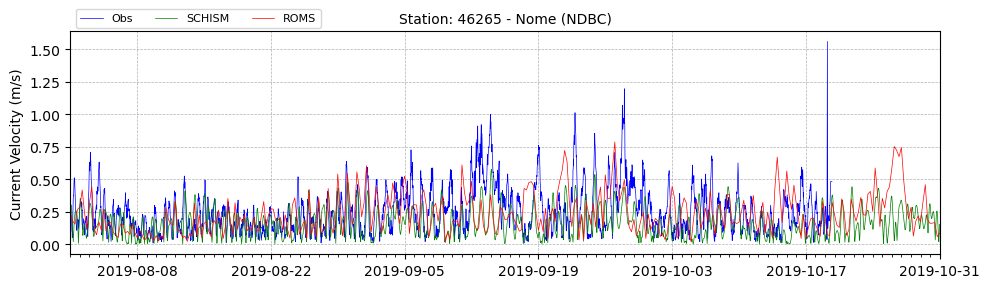

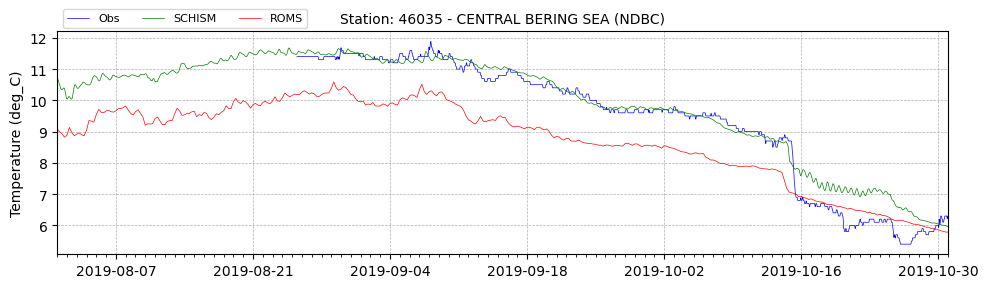

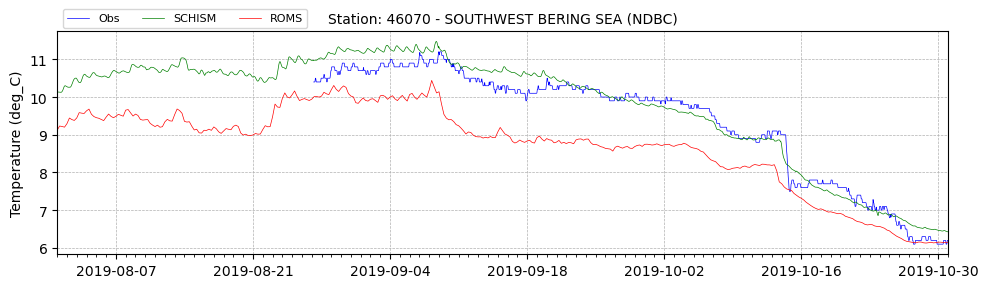

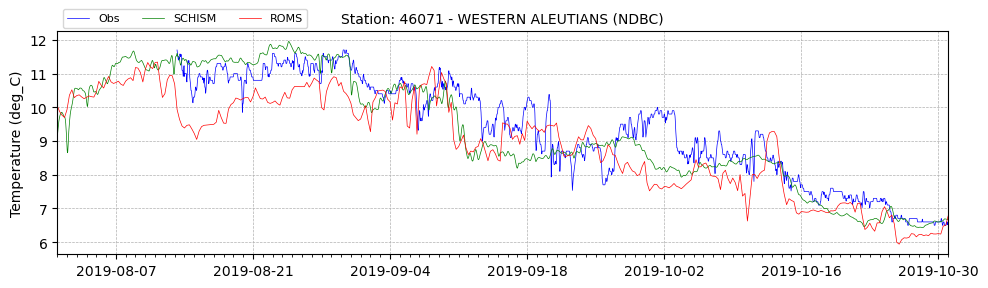

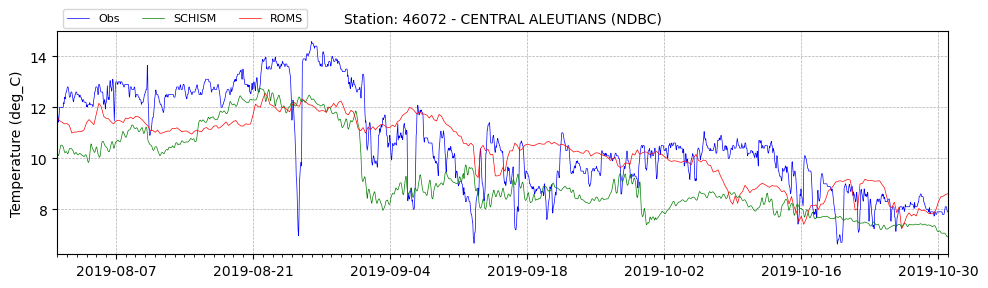

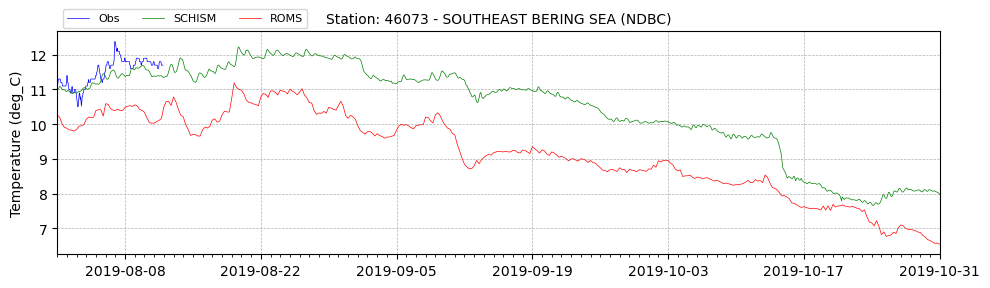

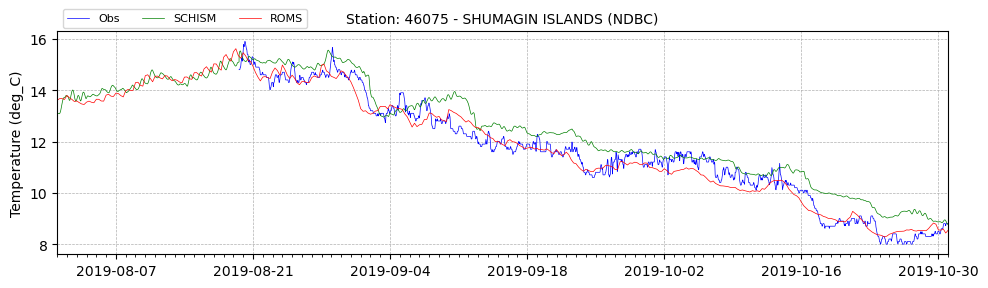

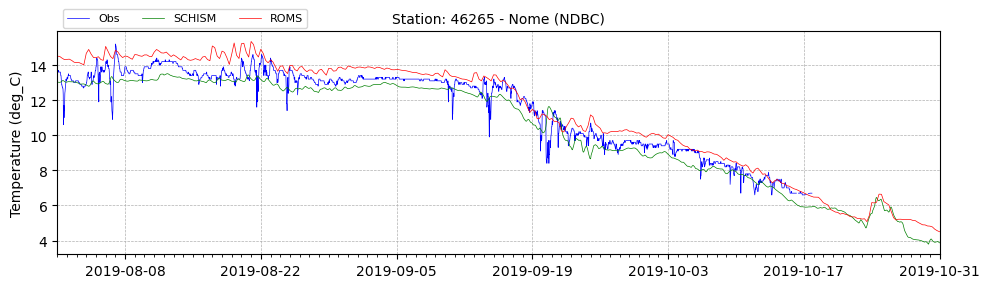

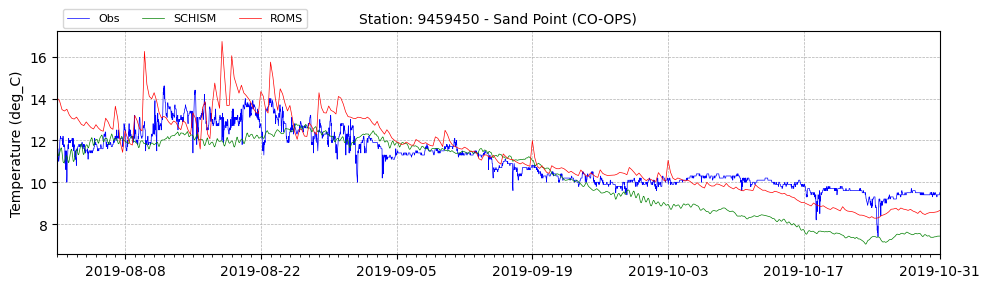

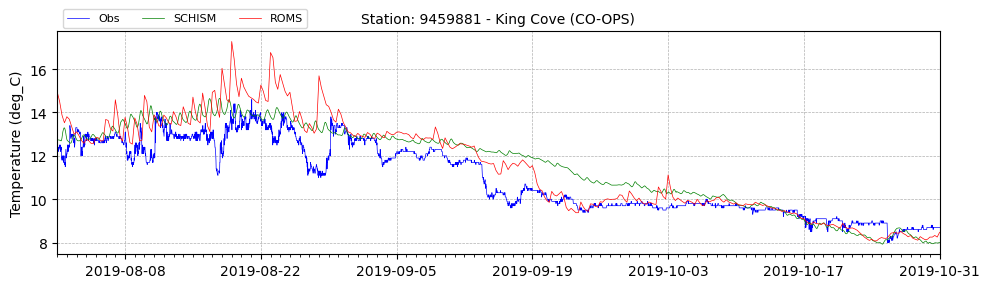

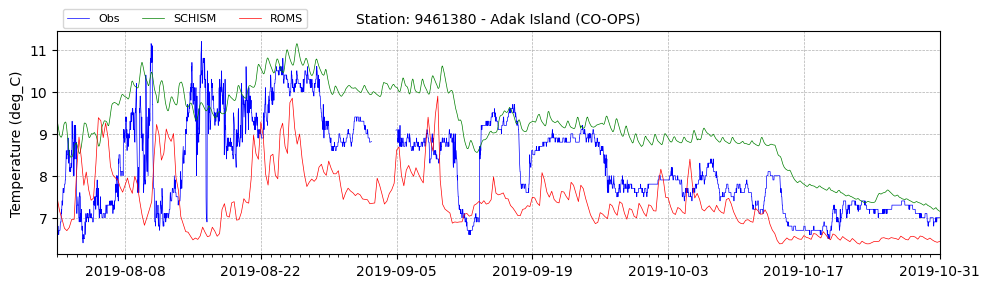

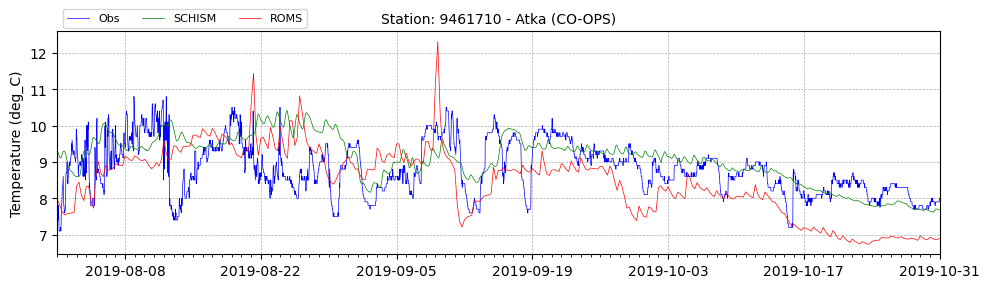

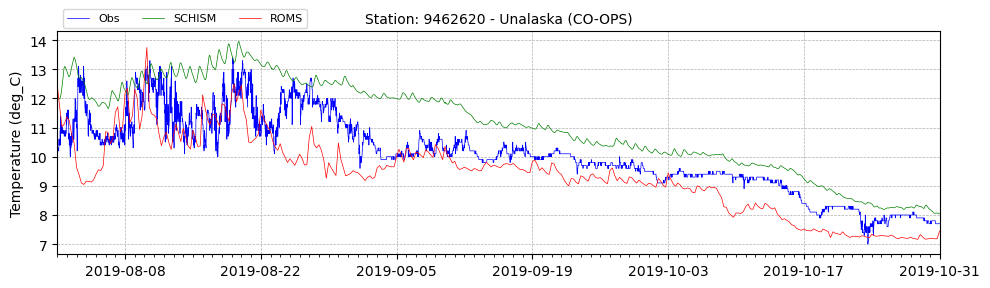

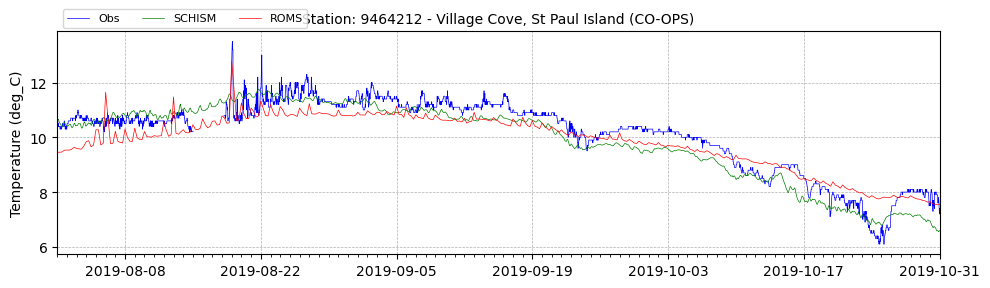

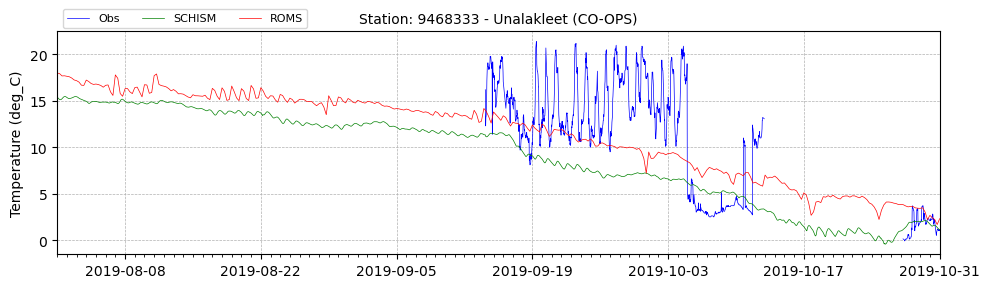

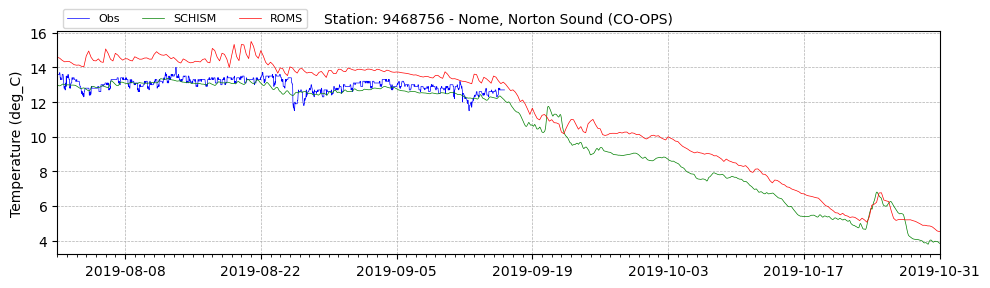

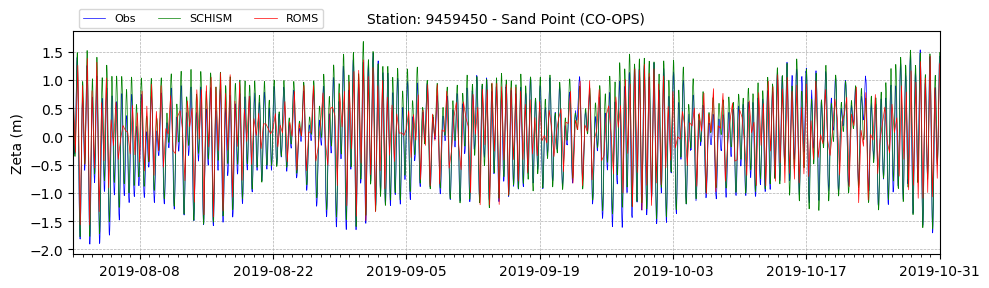

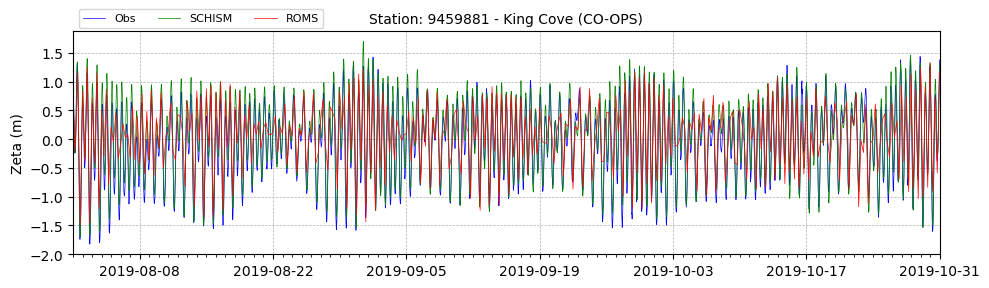

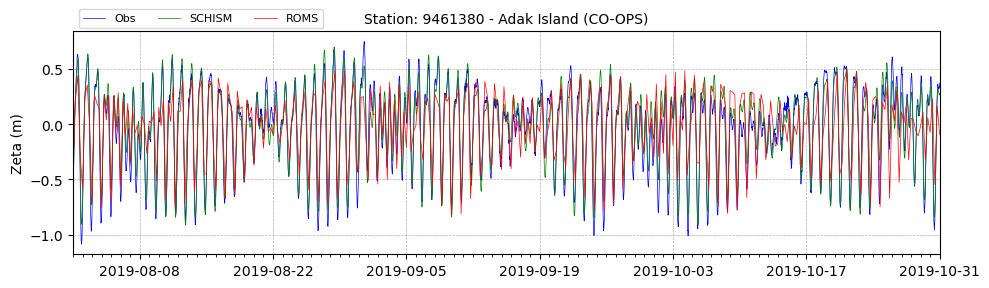

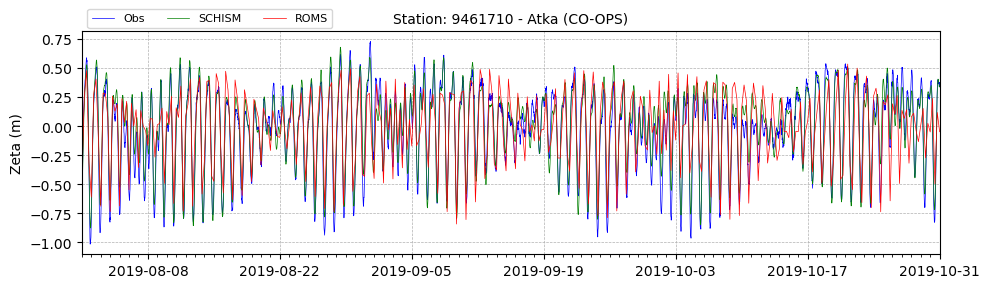

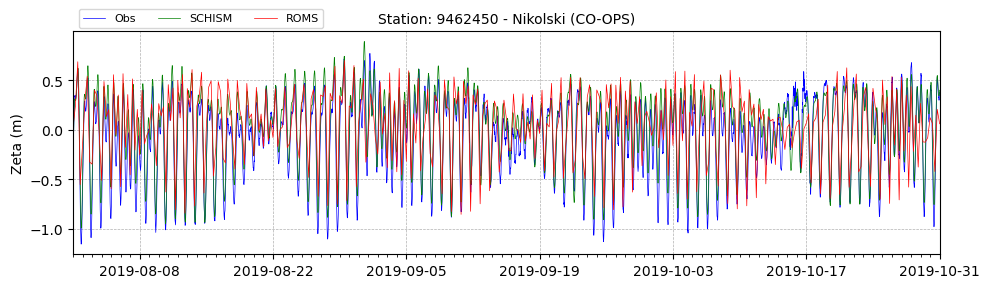

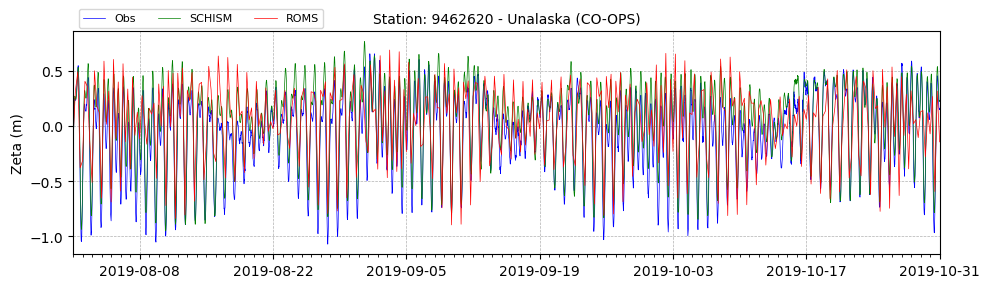

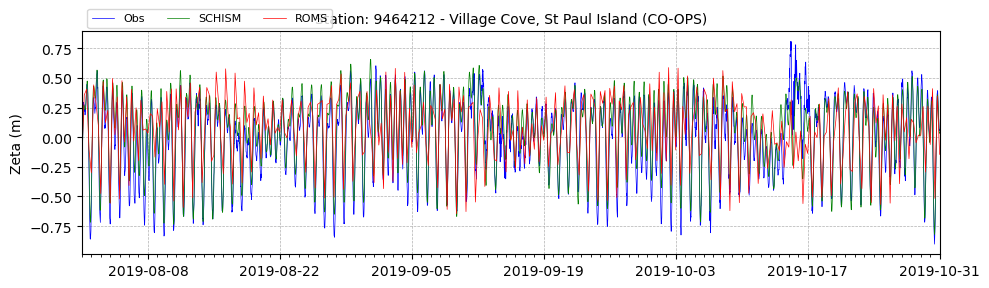

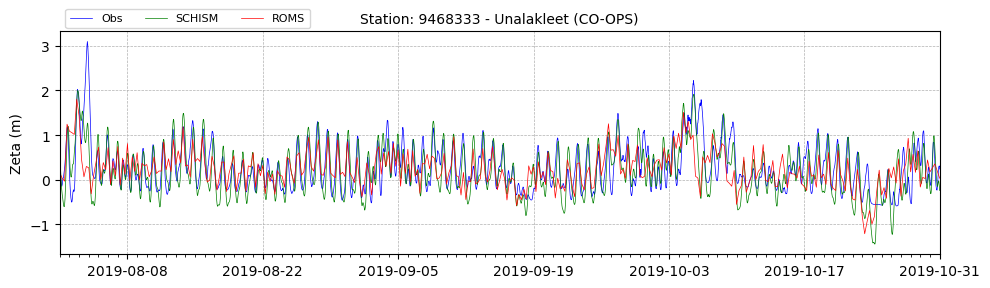

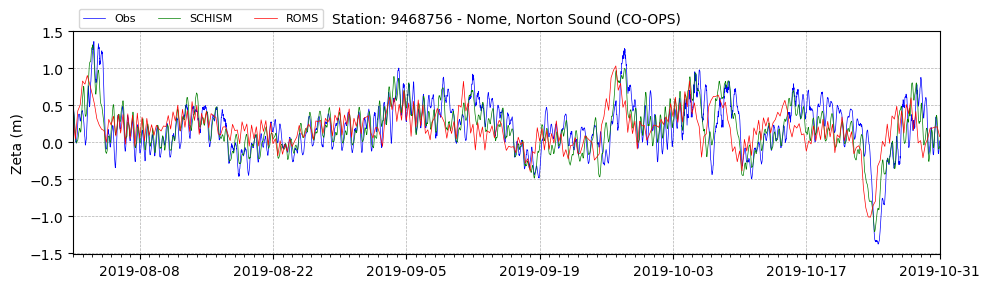

In [49]:
for f in files:
    # try:
    #SCHISM data from SCISA:
    model,var,station_id=f.split("_")[0+1],f.split("_")[1+1],f.split("_")[2+1]#model,var,station=f.split("_")[0],f.split("_")[1],f.split("_")[2]
    station_name = stations_dict[station_id]
    model="SCHISM"

    df = pd.read_csv(path+f, sep='\s+')
    # df['datetime'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']]) + pd.to_timedelta(df['HOUR'], unit='h') + pd.to_timedelta(df['MINUTE'], unit='m')
    df['datetime'] = pd.to_datetime(df['DNUM_JAN1'] + 2458484.5, unit='D', origin='julian')

    #Observations from SCISA
    if var=="wl":
        ylabel="Zeta (m)"
        c_obs="VAL_OB"
        c_mod="VAL_MODEL"
        df[c_obs] = np.where(df[c_obs] > 30, np.nan, df[c_obs])
        df[c_obs] = np.where(df[c_obs] < -30, np.nan, df[c_obs])
        df[c_mod] = np.where(df[c_mod] > 30, np.nan, df[c_mod])
        df[c_mod] = np.where(df[c_mod] < -30, np.nan, df[c_mod])
        
    if var=="temp":
        c_obs="VAL_OB"
        c_mod="VAL_MODEL"
        ylabel="Temperature (deg_C)"
        df[c_obs] = np.where(df[c_obs] > 60, np.nan, df[c_obs])
        df[c_obs] = np.where(df[c_obs] < -30, np.nan, df[c_obs])
        df[c_mod] = np.where(df[c_mod] > 60, np.nan, df[c_mod])
        df[c_mod] = np.where(df[c_mod] < -30, np.nan, df[c_mod])
    if var=="salt":
        c_obs="VAL_OB"
        c_mod="VAL_MODEL"
        ylabel="Salinity (PSU)"
        df[c_obs] = np.where(df[c_obs] > 60, np.nan, df[c_obs])
        df[c_obs] = np.where(df[c_obs] < 0, np.nan, df[c_obs])
        df[c_mod] = np.where(df[c_mod] > 60, np.nan, df[c_mod])
        df[c_mod] = np.where(df[c_mod] < 0, np.nan, df[c_mod])
    if var=="cu":
        c_obs="SPEED_OB"
        c_mod="SPEED_MODEL"
        ylabel="Current Velocity (m/s)"
        df[c_obs] = np.where(df[c_obs] > 20, np.nan, df[c_obs])
        df[c_obs] = np.where(df[c_obs] < -20, np.nan, df[c_obs])
        df[c_mod] = np.where(df[c_mod] > 20, np.nan, df[c_mod])
        df[c_mod] = np.where(df[c_mod] < -20, np.nan, df[c_mod])
        df['SPEED_OB'] = df['SPEED_OB'].abs()
        
    #df = df[~(df == -999).any(axis=1)]
    df = df.replace(-999, np.nan)
    # df = df.dropna()
    if len(df[c_obs].dropna()) < 100 or len(df[c_mod].dropna()) < 100:
        print(f)
        continue

    #ROMS data:
    sta_idx = np.argwhere(roms.id.values == station_id)
    if var == "wl":
        roms_var = subset.zeta.values[sta_idx]
    if var == "temp":
        roms_var = subset.temp.values[sta_idx]    
    if var == "cu":
        roms_var = subset.speed.values[sta_idx]
        
     # Create the plot
    fig, ax = plt.subplots(figsize=(10, 3))
    # Plot multiple lines
    ax.plot(df['datetime'], df[c_obs], label='Obs', color='b',linewidth=0.5)
    ax.plot(df['datetime'], df[c_mod], label=model.upper(),color='g',linewidth=0.5) #linestyle='--'
    ax.plot(subset_dt, roms_var.ravel(), label='ROMS',color='r',linewidth=0.5)
    # ax.plot(df_ocs_nav.index, df_ocs_nav[station], label='OCSMesh', linestyle='--',color='r')

    # Set x-axis limits
    #ax.set_xlim(pd.Timestamp('2021-08-15 00:00:00'), pd.Timestamp('2021-09-30 00:00:00'))

    # Format the x-axis
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))  # Set major ticks on each day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date labels
    # plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    # plt.axvline(datetime.datetime(2021, 8, 28), linestyle=':', color='k')
    # plt.axvline(datetime.datetime(2021, 8, 30), linestyle=':', color='k')
    # plt.axvline(datetime.datetime(2021, 9, 3), linestyle=':', color='k')
    ax.grid(True,  linestyle='--',linewidth=0.5)
    # plt.text(.7, .94, '+.20m bias corrected', transform=ax.transAxes)


    plt.margins(x=0)
    plt.ylabel(ylabel, fontsize=10)
    plt.title(f'Station: {station_id} - {station_name}', fontsize=10)
    # plt.legend(ncol=3,loc='upper left')
    plt.legend(ncol=3,bbox_to_anchor=(0.0, 1.125), loc='upper left', fontsize=8)
    plt.tight_layout()
        
    plt.savefig(out_dir+f'{var}_{station_id}.jpeg', dpi=300)
    # except:
    #     pass